Stroke Prediction with Logistic Regression vs Linear Regression

In [42]:
# import lines
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as mn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.metrics import classification_report
# Read in csv
df = pd.read_csv("stroke_dataset.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [45]:
df[['id', 'stroke']]

,id,stroke
0,9046,1
1,51676,1
2,31112,1
3,60182,1
4,1665,1
...,...,...
5105,18234,0
5106,44873,0
5107,19723,0
5108,37544,0


In [46]:
categorical_columns = list(df.select_dtypes(include=['object']).columns)
for column in categorical_columns:
    print("{}:".format(column), df[column].unique())
# all categorical columns dont have too many categories, thus no need for grouping


gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Data Exploration

In [47]:
# target is binary, 1 for yes 0 for no
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot: xlabel='stroke', ylabel='count'>

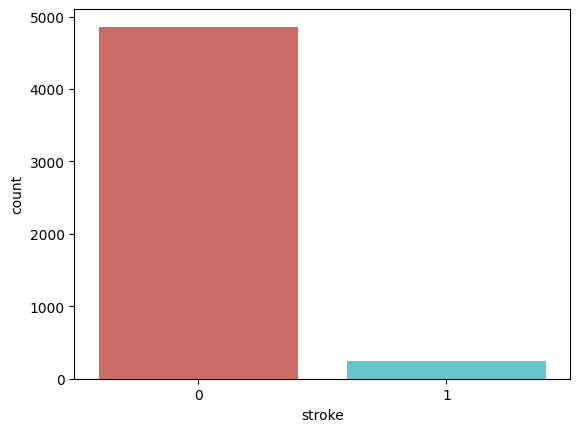

In [48]:
sns.countplot(x = "stroke", data = df, palette="hls")
# classes are wildly imbalanced, no stroke:stroke is large
# first do more exploration

In [49]:
# get categorical means for target
df.groupby("stroke").mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,36487.236371,41.971545,0.088871,0.047110,104.795513,28.823064
1,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292


In [50]:
''' 
Average age of people who got a stroke is higher than average age of people who did not get a stroke -> could be good predictor
People who got strokes were more likely to have hypertension than that of people who did not get strokes ---> could be good predictor
People who got strokes were also more likely to have heart disease than that of people who did not get strokes--> could be good predictor
avg glucose level of stroke patients higher than that of healthy people --> could be good predictor
bmi is only slightly higher for stroke patients --> likely ambiguous --> not a good predictor

conclusions : age, hypertension, heart disease, glucose level could be good possible predictors

'''

' \nAverage age of people who got a stroke is higher than average age of people who did not get a stroke -> could be good predictor\nPeople who got strokes were more likely to have hypertension than that of people who did not get strokes ---> could be good predictor\nPeople who got strokes were also more likely to have heart disease than that of people who did not get strokes--> could be good predictor\navg glucose level of stroke patients higher than that of healthy people --> could be good predictor\nbmi is only slightly higher for stroke patients --> likely ambiguous --> not a good predictor\n\nconclusions : age, hypertension, heart disease, glucose level could be good possible predictors\n\n'

In [51]:
# now get categorical means for all other categorical variables for further data analysis
categorical_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [52]:
df.groupby("gender").mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,,
Female,36479.685037,43.757395,0.092184,0.037742,104.057809,29.065758,0.047094
Male,36562.541371,42.483385,0.104965,0.077069,109.088520,28.647936,0.051064
Other,56156.000000,26.000000,0.000000,0.000000,143.330000,22.400000,0.000000


In [53]:

# Gender has little no effect on stroke likelihood, all other categorical variables are also similar, therefore likely bad predictor.


In [54]:
df.groupby("ever_married").mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
ever_married,,,,,,,
No,36117.673307,22.014229,0.030165,0.018213,96.44815,25.214721,0.016505
Yes,36727.514465,54.342082,0.132717,0.072771,111.23031,30.850749,0.065613


In [55]:
# Being married seems to increase stroke likelihood by around 80%, all of the other "good" predictors also increase correspondingly therefore could be entirely coincidental

In [56]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [57]:
df.groupby("work_type").mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
work_type,,,,,,,
Govt_job,36516.936073,50.879756,0.111111,0.054795,107.779772,30.522063,0.050228
Never_worked,38274.409091,16.181818,0.000000,0.000000,96.042727,25.545455,0.000000
Private,36951.227009,45.503932,0.096068,0.054017,106.796844,30.304625,0.050940
Self-employed,35551.288156,60.201465,0.175824,0.098901,112.645446,30.211871,0.079365
children,35769.432314,6.841339,0.000000,0.001456,94.400277,20.038003,0.002911


In [58]:
# work type overall does not seem like a good predictor

In [59]:
df.groupby("Residence_type").mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
Residence_type,,,,,,,
Rural,36547.998011,42.900811,0.099841,0.053302,106.375235,28.894212,0.045346
Urban,36488.613636,43.542126,0.095146,0.054700,105.927307,28.892289,0.052003


In [60]:
# bad predictor

In [61]:
df.groupby("smoking_status").mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,
Unknown,35899.042098,30.229922,0.033679,0.031088,99.601541,25.666352,0.030440
formerly smoked,36878.981921,54.929944,0.135593,0.087006,112.886079,30.747192,0.079096
never smoked,36833.141649,46.744715,0.122622,0.047569,107.558092,29.982559,0.047569
smokes,36567.533587,47.096324,0.119138,0.077313,108.017440,30.543555,0.053232


In [62]:
# people who have formerly smoked, likely to have stroke, same with people who currently smoke

In [63]:
categorical_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

Data Visualizations

Text(0.5, 1.0, 'Stroke Likelihood given Smoking Status')

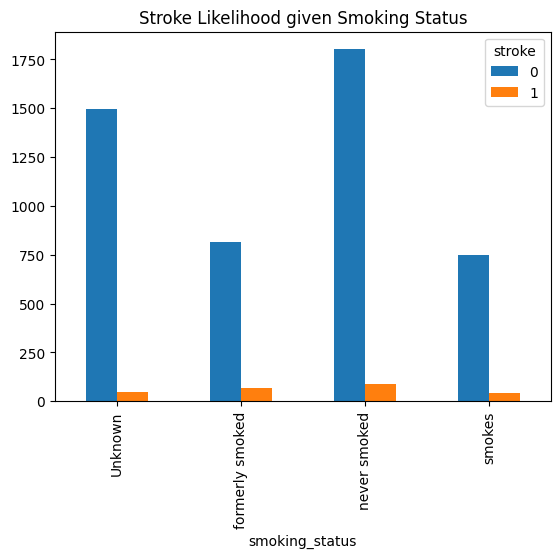

In [64]:
pd.crosstab(df.smoking_status, df.stroke).plot(kind="bar")
plt.title("Stroke Likelihood given Smoking Status")

In [65]:
# people who have formerly smoked wayy more likely to get stroke, stroke bars are similar only because of range, less people in dataset had formerly smoked

Text(0.5, 1.0, 'Stroke Likelihood given Marriage Status')

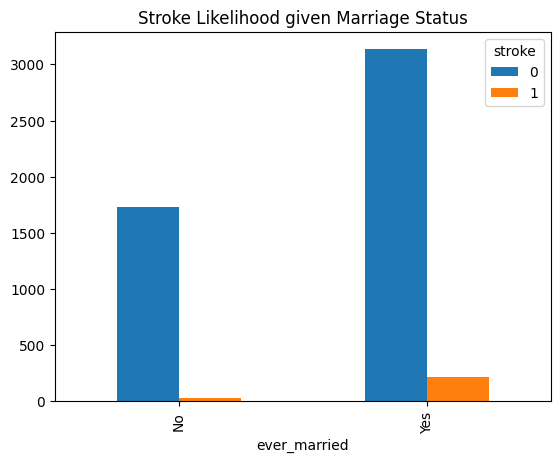

In [66]:
pd.crosstab(df.ever_married, df.stroke).plot(kind="bar")
plt.title("Stroke Likelihood given Marriage Status")

In [67]:
# bar graph once again shows that marriage status could be a good predictor for stroke likelihood

In [68]:
# good predictors ==> age, hypertension, glucose level, heart disease




In [69]:
feature_cols = ["age", "hypertension", "avg_glucose_level", "heart_disease"]

x = df[feature_cols]

y = df['stroke']



In [70]:
# Split X and Y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)



In [71]:
logreg = LogisticRegression(random_state=16)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [72]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1210,    0],
       [  68,    0]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

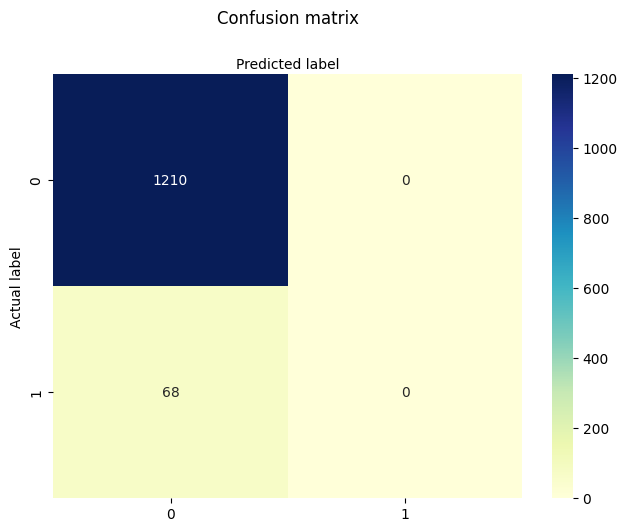

In [73]:
# Visualizations using heatmap

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [74]:

target_names = ['No Stroke', 'Stroke']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1210
      Stroke       0.00      0.00      0.00        68

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.90      0.95      0.92      1278



Now we try Linear Regression

First we need to fill the NAN inputs for bmi using interpolation

<AxesSubplot: >

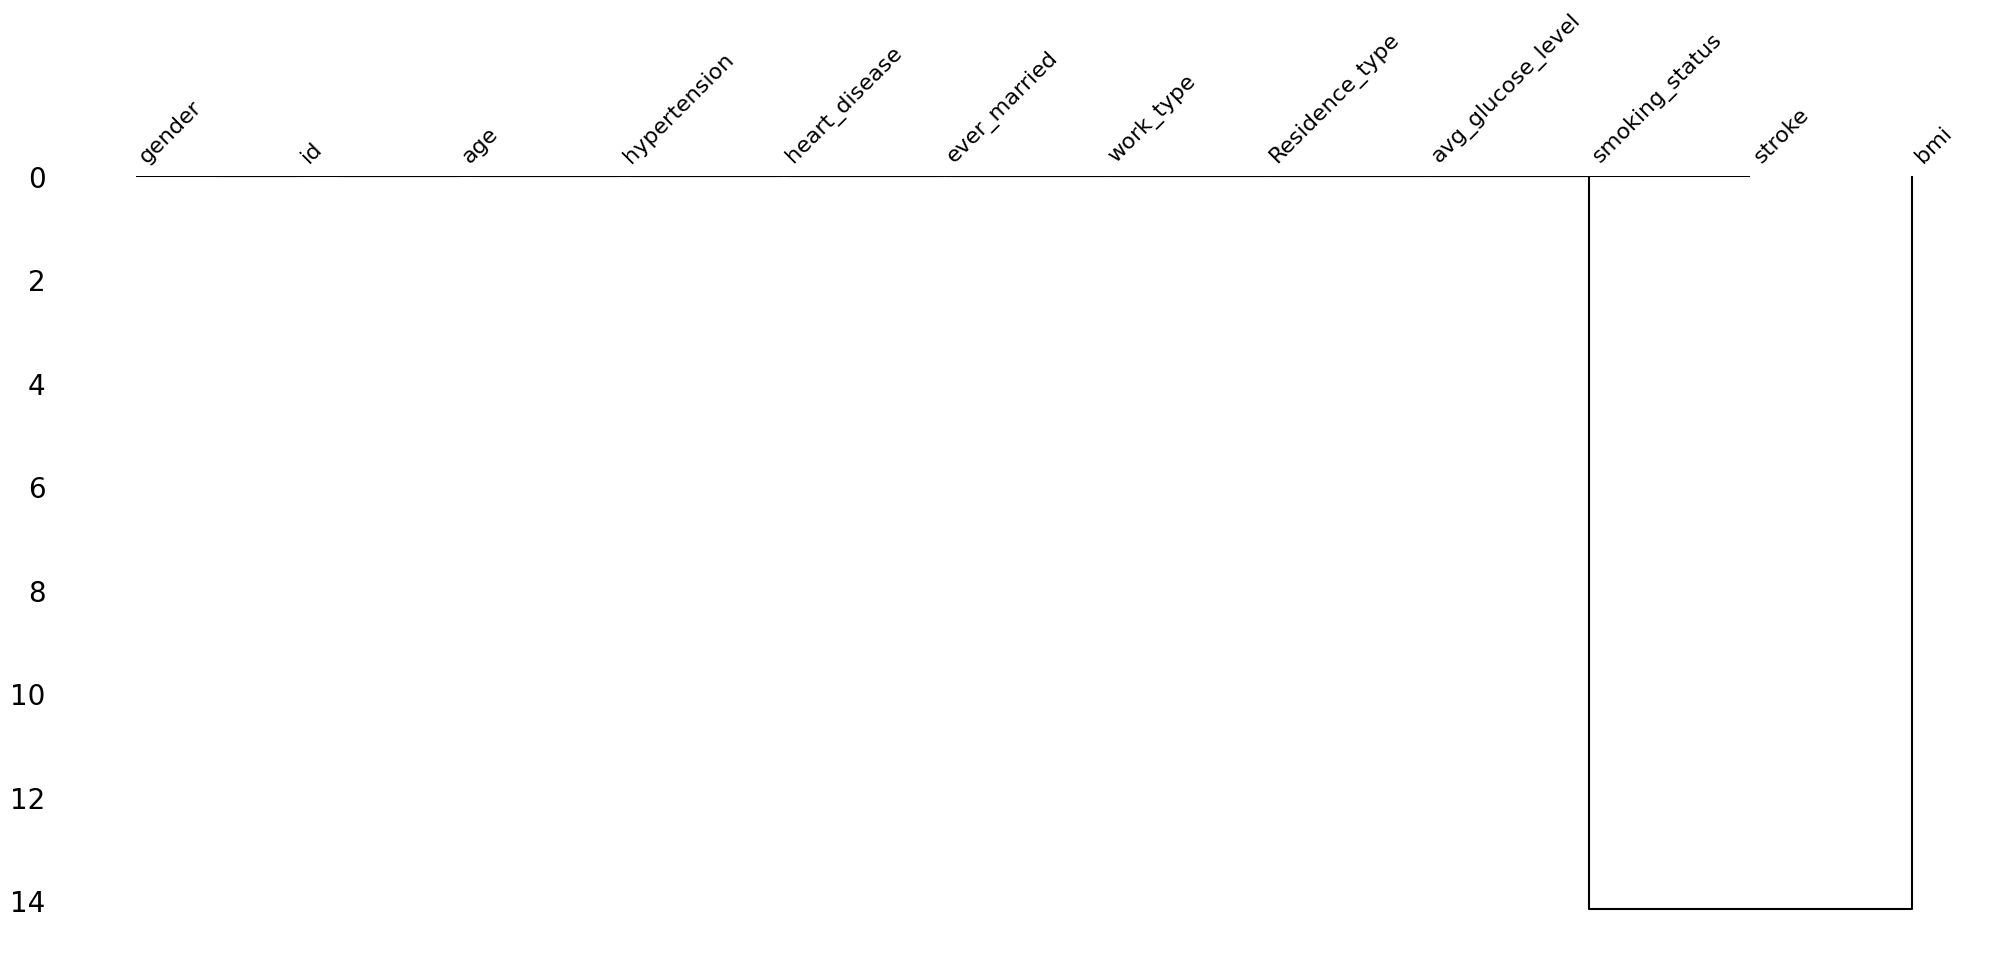

In [75]:
mn.dendrogram(df)

Dendrogram shows bmi and smoking status are most similar, therefore we fill the data using this

In [76]:
df[df['bmi'].isnull()]['smoking_status'].value_counts()

Unknown            61
smokes             52
formerly smoked    48
never smoked       40
Name: smoking_status, dtype: int64

In [77]:
df['bmi'] = df['bmi'].interpolate(method ='linear', limit_direction='forward')

In [78]:

# lets check if that worked 
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [79]:
lr_df = df.copy()
lr_df.drop(['gender'], axis=1, inplace=True)
lr_df.drop(['smoking_status'], axis=1, inplace=True)
lr_df.drop(['ever_married'], axis=1, inplace=True)
lr_df.drop(['work_type'], axis=1, inplace=True)
lr_df.drop(['Residence_type'], axis=1, inplace=True)

In [80]:
x = lr_df.drop(["stroke"], axis=1)
y = df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)

In [81]:
linreg = LinearRegression()

linreg = linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print(linreg.intercept_)
print(linreg.coef_)

-0.04898417658734007
[ 2.60284922e-08  1.84998602e-03  4.36159596e-02  6.17539152e-02
  3.25705125e-04 -9.13003876e-04]


In [82]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_absolute_error(y_test, y_pred)))
print("Explain variance score:", round(explained_variance_score(y_test,y_pred), 2))

MAE: 0.09738177690163803
MSE: 0.045930956935802784
RMSE: 0.3120605340340845
Explain variance score: 0.09
